In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("household_power_consumption.txt" ,sep= ";")

In [4]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [8]:
df1=df.sample(n=50000)

In [9]:
df1=df1.drop(["Date","Time"],axis=1)

In [10]:
df1

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
39506,0.406,0.300,244.840,2.000,0.000,1.000,0.0
138540,2.544,0.000,237.520,10.600,0.000,0.000,18.0
739011,2.914,0.262,237.340,12.400,1.000,1.000,18.0
1519147,0.352,0.106,242.540,1.400,0.000,0.000,1.0
1926732,2.396,0.000,239.530,10.000,0.000,37.000,1.0
...,...,...,...,...,...,...,...
760544,0.618,0.190,240.100,2.600,0.000,2.000,0.0
913623,0.234,0.094,239.330,1.000,0.000,1.000,1.0
614110,1.458,0.098,243.580,6.000,0.000,0.000,19.0
1460401,2.246,0.218,238.800,9.400,0.000,0.000,18.0


In [11]:
df1.isnull().sum()

Global_active_power        0
Global_reactive_power      0
Voltage                    0
Global_intensity           0
Sub_metering_1             0
Sub_metering_2             0
Sub_metering_3           636
dtype: int64

In [12]:
df2=df1.dropna()

In [13]:
df2.shape

(49364, 7)

In [14]:
df2.dtypes

Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [15]:
df2=df2.iloc[:,:].astype('float')

In [16]:
df2.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [17]:
df2["Active Enegry"]=((df2["Global_active_power"]*1000)/60-df2["Sub_metering_1"]-df2["Sub_metering_2"]-df2["Sub_metering_3"])

In [18]:
df2

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Active Enegry
39506,0.406,0.300,244.84,2.0,0.0,1.0,0.0,5.766667
138540,2.544,0.000,237.52,10.6,0.0,0.0,18.0,24.400000
739011,2.914,0.262,237.34,12.4,1.0,1.0,18.0,28.566667
1519147,0.352,0.106,242.54,1.4,0.0,0.0,1.0,4.866667
1926732,2.396,0.000,239.53,10.0,0.0,37.0,1.0,1.933333
...,...,...,...,...,...,...,...,...
760544,0.618,0.190,240.10,2.6,0.0,2.0,0.0,8.300000
913623,0.234,0.094,239.33,1.0,0.0,1.0,1.0,1.900000
614110,1.458,0.098,243.58,6.0,0.0,0.0,19.0,5.300000
1460401,2.246,0.218,238.80,9.4,0.0,0.0,18.0,19.433333


In [19]:
df2.reset_index()

,index,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Active Enegry
0,39506,0.406,0.300,244.84,2.0,0.0,1.0,0.0,5.766667
1,138540,2.544,0.000,237.52,10.6,0.0,0.0,18.0,24.400000
2,739011,2.914,0.262,237.34,12.4,1.0,1.0,18.0,28.566667
3,1519147,0.352,0.106,242.54,1.4,0.0,0.0,1.0,4.866667
4,1926732,2.396,0.000,239.53,10.0,0.0,37.0,1.0,1.933333
...,...,...,...,...,...,...,...,...,...
49359,760544,0.618,0.190,240.10,2.6,0.0,2.0,0.0,8.300000
49360,913623,0.234,0.094,239.33,1.0,0.0,1.0,1.0,1.900000
49361,614110,1.458,0.098,243.58,6.0,0.0,0.0,19.0,5.300000
49362,1460401,2.246,0.218,238.80,9.4,0.0,0.0,18.0,19.433333


In [20]:
df2.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Active Enegry
39506,0.406,0.300,244.84,2.0,0.0,1.0,0.0,5.766667
138540,2.544,0.000,237.52,10.6,0.0,0.0,18.0,24.400000
739011,2.914,0.262,237.34,12.4,1.0,1.0,18.0,28.566667
1519147,0.352,0.106,242.54,1.4,0.0,0.0,1.0,4.866667
1926732,2.396,0.000,239.53,10.0,0.0,37.0,1.0,1.933333


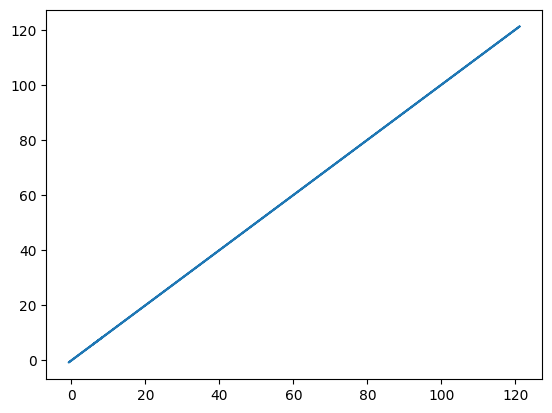

In [21]:
plt.plot(df2['Active Enegry'],df2['Active Enegry'])

<AxesSubplot:xlabel='Global_active_power'>

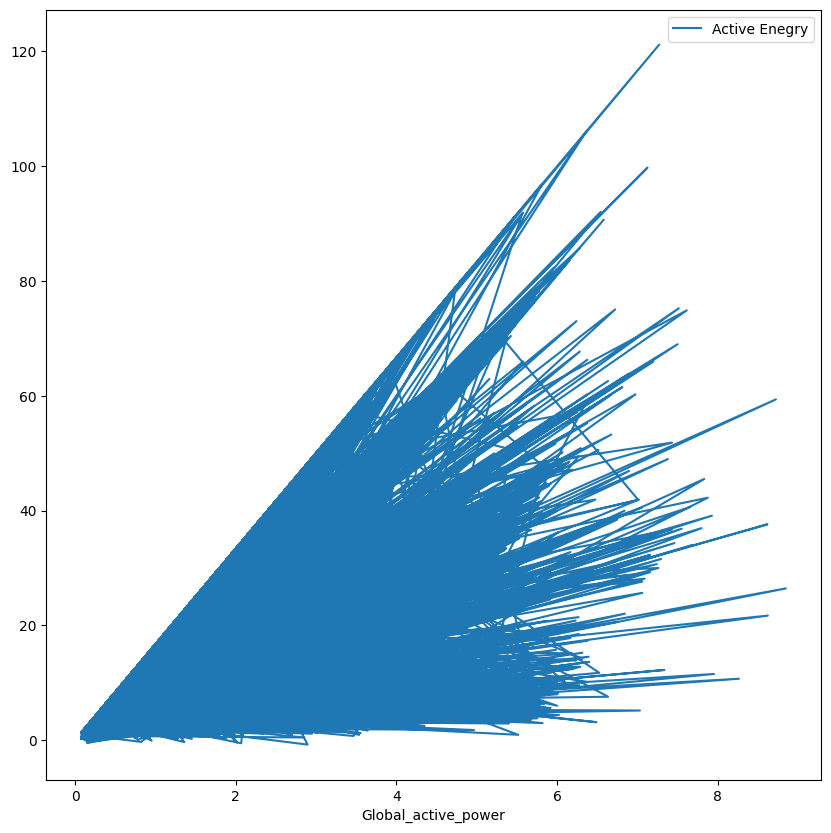

In [22]:
df2.plot(x="Global_active_power", y="Active Enegry",kind="line", figsize=(10, 10))

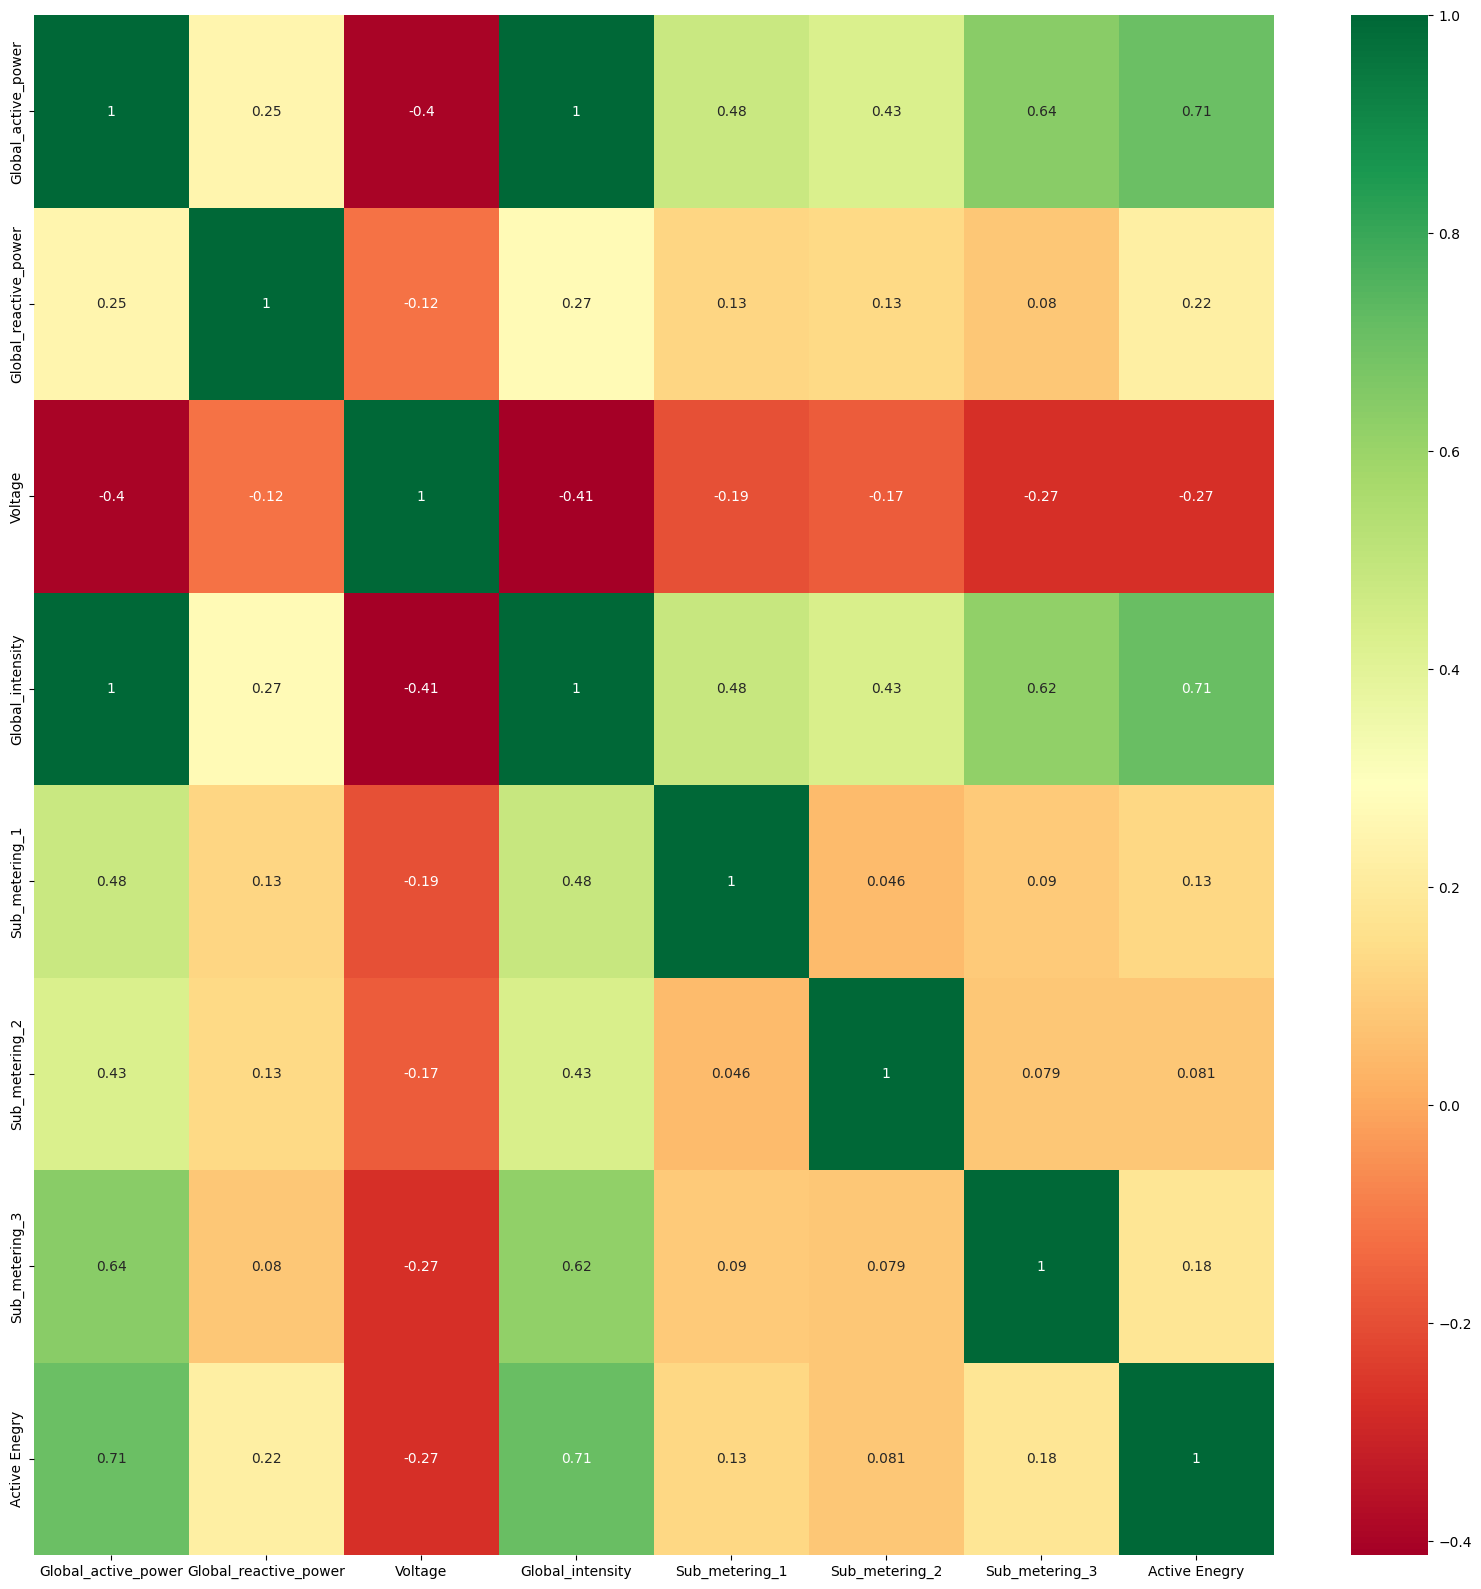

In [23]:
corrmat=df2.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

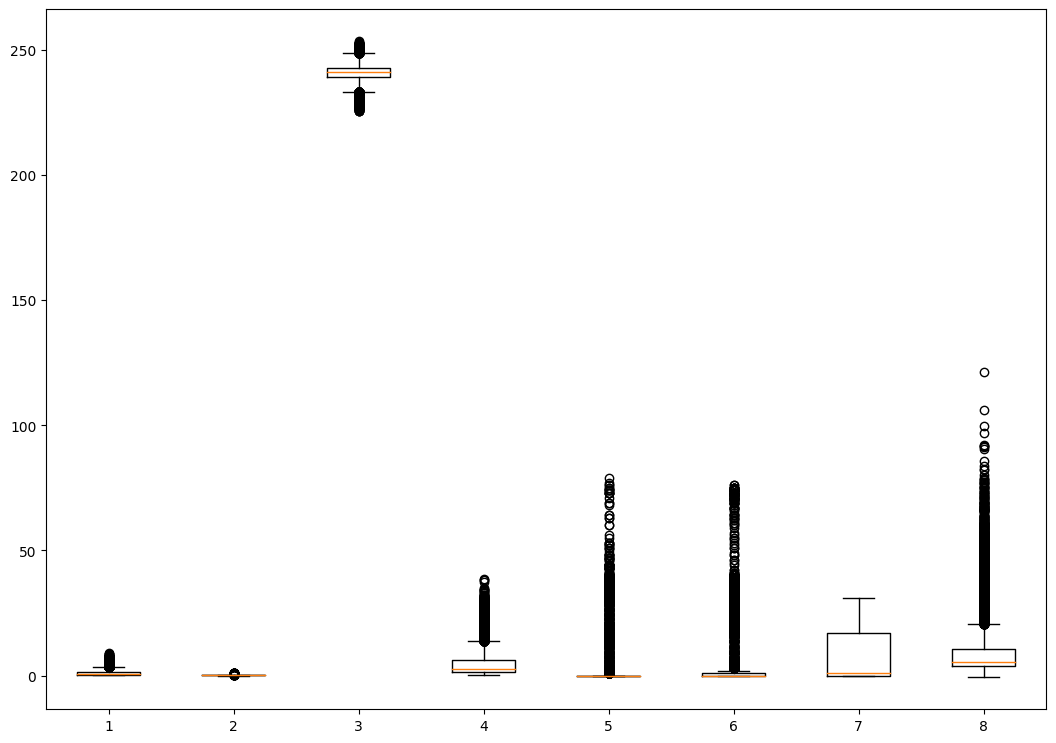

In [24]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(df2)
plt.show()

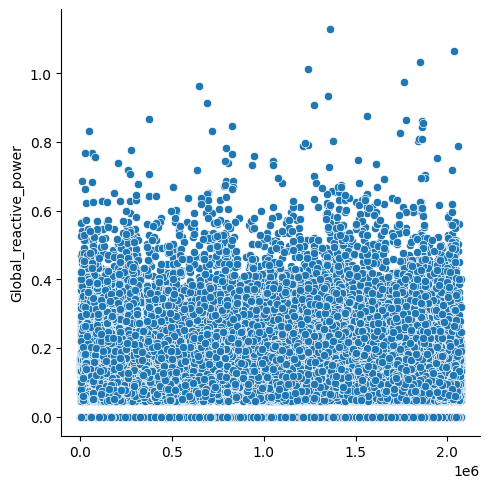

In [25]:
sns.relplot(data=df2["Global_reactive_power"])

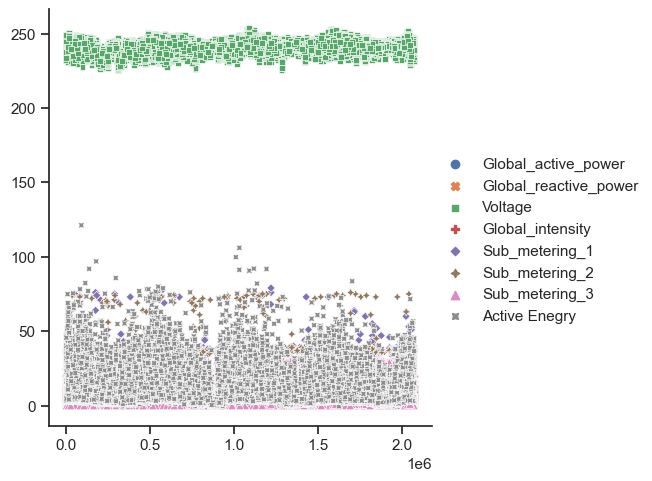

In [27]:
import seaborn as sns
sns.set_theme(style="ticks")


palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
sns.relplot(data=df2)

C:\Users\SU-30\anaconda3\envs\carprediction\lib\site-packages\ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
C:\Users\SU-30\anaconda3\envs\carprediction\lib\site-packages\ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
C:\Users\SU-30\anaconda3\envs\carprediction\lib\site-p

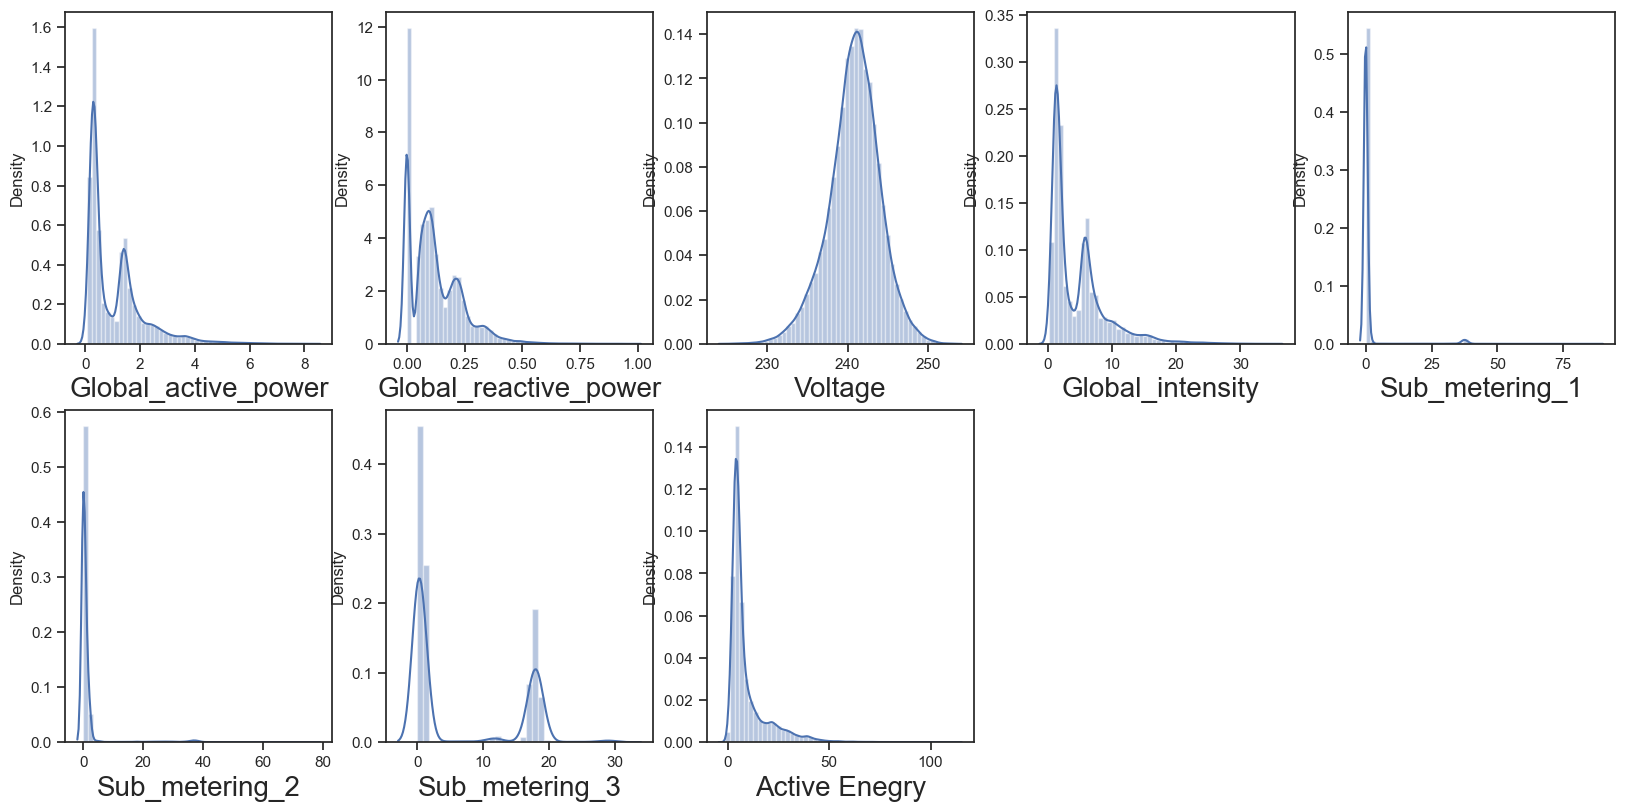

In [92]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df2:
    if plotnumber<=15 :
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(df2[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [28]:
df2.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Active Enegry'],
      dtype='object')

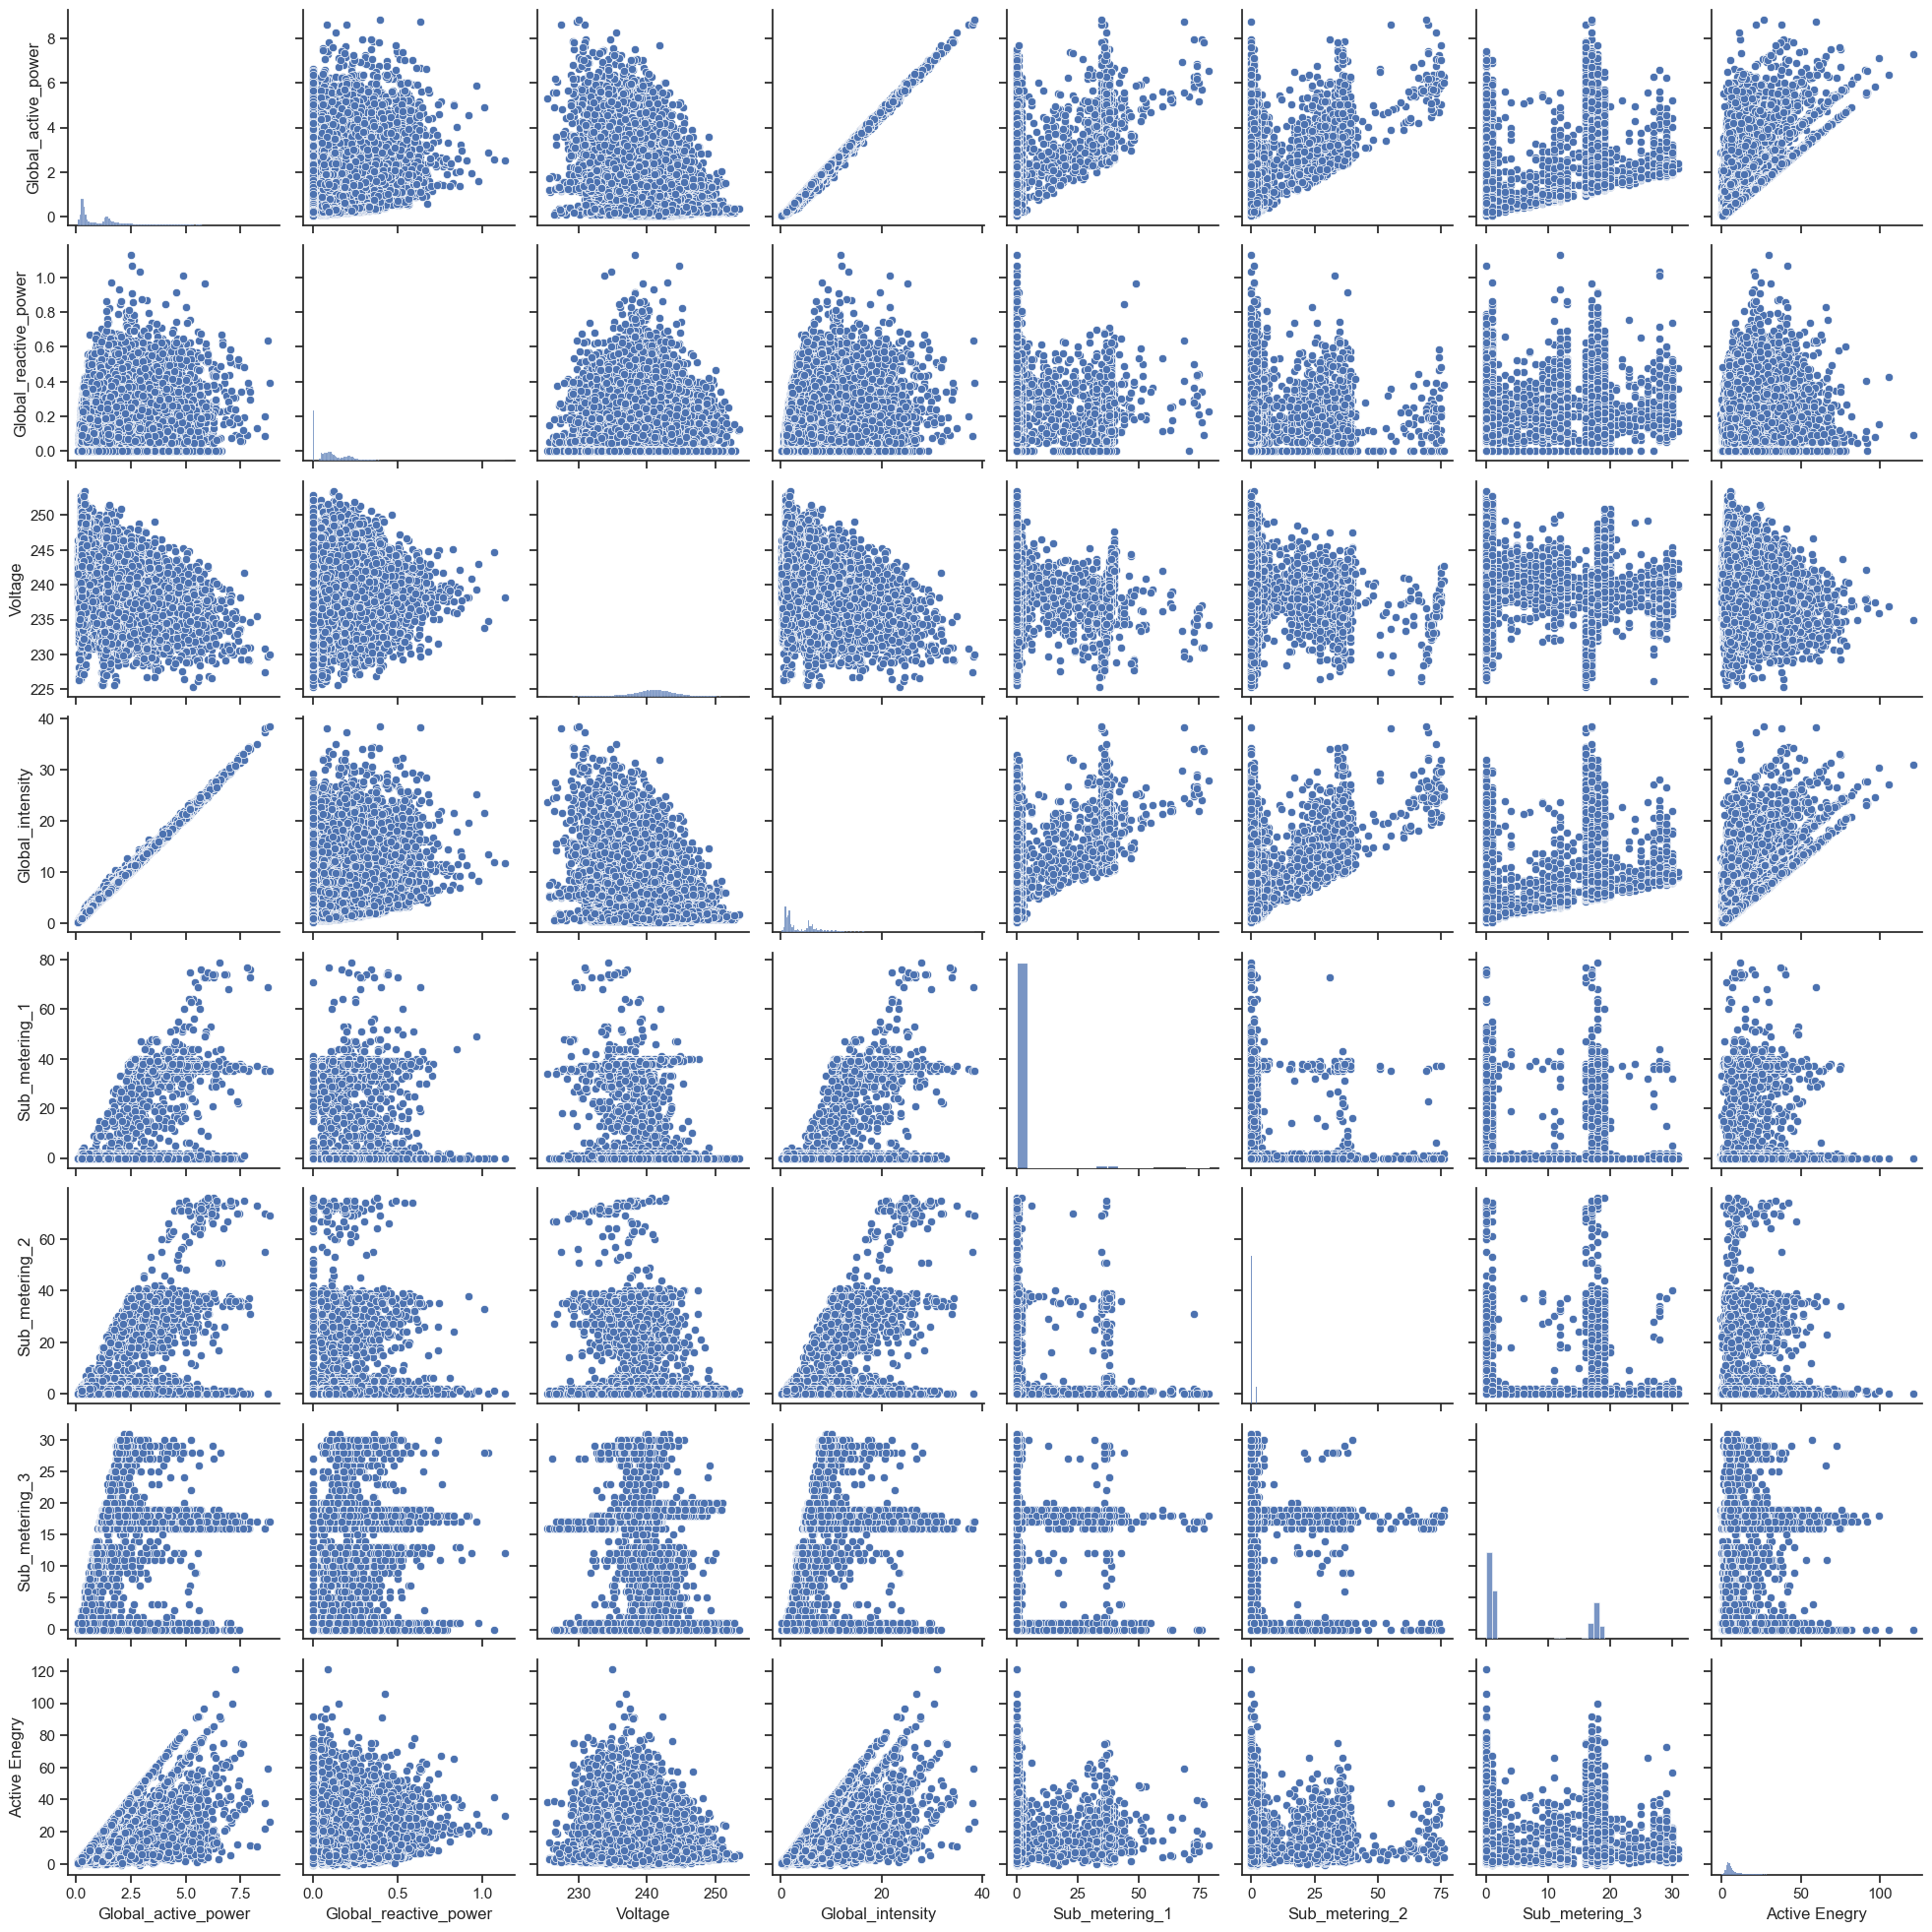

In [29]:
sns.pairplot(df2)

In [30]:
df2.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Active Enegry'],
      dtype='object')

In [31]:
X=df2.iloc[:,:-1]

In [32]:
y=df2.iloc[:,-1]

In [33]:
df2.reset_index(inplace = True)

In [34]:
df3=df2.copy()

In [35]:
X=df3.iloc[:,1:8]

In [36]:
X.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.406,0.300,244.84,2.0,0.0,1.0,0.0
1,2.544,0.000,237.52,10.6,0.0,0.0,18.0
2,2.914,0.262,237.34,12.4,1.0,1.0,18.0
3,0.352,0.106,242.54,1.4,0.0,0.0,1.0
4,2.396,0.000,239.53,10.0,0.0,37.0,1.0


In [37]:
y=df3.iloc[:,-1]

In [38]:
y

0         5.766667
1        24.400000
2        28.566667
3         4.866667
4         1.933333
           ...    
49359     8.300000
49360     1.900000
49361     5.300000
49362    19.433333
49363     8.300000
Name: Active Enegry, Length: 49364, dtype: float64

In [39]:
y.head()

0     5.766667
1    24.400000
2    28.566667
3     4.866667
4     1.933333
Name: Active Enegry, dtype: float64

In [43]:
X_test.shape

(16291, 7)

# Train_test_Split 

In [46]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=10)

In [48]:
X_train.shape

(33073, 7)

In [49]:
y_train.shape

(33073,)

In [50]:
X_test.shape

(16291, 7)

In [51]:
y_test.shape

(16291,)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [53]:
scaler

StandardScaler()

In [54]:
X_train_scaled=scaler.fit_transform(X_train)

In [55]:
X_test_scaled=scaler.transform(X_test)

In [56]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train_scaled,y_train)

LinearRegression()

In [57]:
regression = LinearRegression()

In [58]:
regression.fit(X_train_scaled,y_train)

LinearRegression()

In [59]:
print(regression.coef_)

[ 1.75520472e+01  1.77635684e-15  5.10702591e-15  8.79296636e-14
 -6.06240477e+00 -5.83847355e+00 -8.44494542e+00]


In [60]:
print(regression.coef_)
print(regression.intercept_)

[ 1.75520472e+01  1.77635684e-15  5.10702591e-15  8.79296636e-14
 -6.06240477e+00 -5.83847355e+00 -8.44494542e+00]
9.32497707092392


In [61]:
y_pred=regression.predict(X_test_scaled)

Text(0, 0.5, 'Test predicted data')

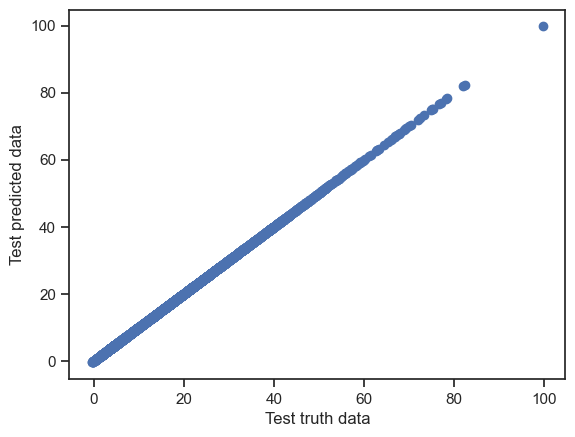

In [62]:
plt.scatter(y_test,y_pred)
plt.xlabel("Test truth data")
plt.ylabel("Test predicted data")

In [63]:
residuals =y_test-y_pred

In [64]:
residuals

24099   -8.437695e-14
35714   -9.814372e-14
25944    2.131628e-13
4233     3.463896e-14
15629    1.305622e-13
             ...     
42884   -8.615331e-14
10674   -8.881784e-14
42760    1.243450e-14
6140     3.375078e-14
11505   -5.329071e-14
Name: Active Enegry, Length: 16291, dtype: float64

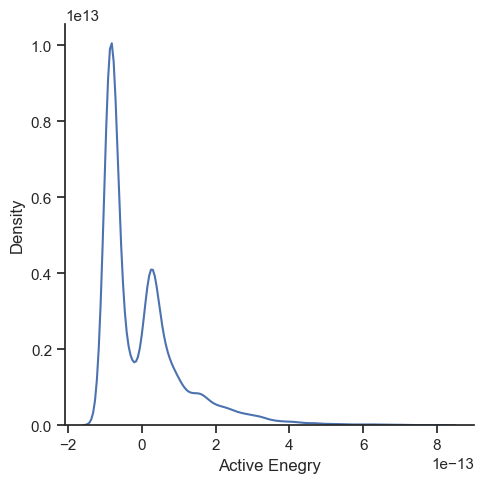

In [65]:
sns.displot(residuals,kind="kde")

Text(0.5, 0, 'distribuction')

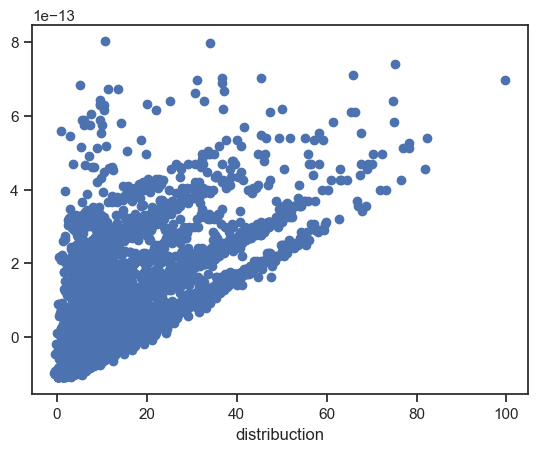

In [66]:
plt.scatter(y_pred,residuals)
plt.xlabel("distribuction")

In [70]:
##performance matrix
import numpy as np

In [71]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_absolute_error(y_test, y_pred)))

1.2681572610335903e-26
8.556246443119358e-14
2.9251062276641097e-07


In [72]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

1.0


In [73]:
##adjusted r2 score
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[-1]-1)

1.0

# Ridge`

In [74]:
from sklearn.linear_model import Ridge

In [75]:
from sklearn.model_selection import GridSearchCV


In [76]:
ridge=Ridge()

In [77]:
parameters={'alpha':[1,2,5,10,20,30,40]}
ridge_cv=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

In [78]:
ridge_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40]},
             scoring='neg_mean_squared_error')

In [79]:
print(ridge_cv.best_params_)

{'alpha': 1}


In [80]:
print(ridge_cv.best_score_)

-0.00023198709067214185


In [81]:
ridge_pred=ridge_cv.predict(X_test)

In [82]:
ridge_pred

array([ 5.36427609,  3.87906198, 20.28518383, ...,  3.53443573,
        4.50223554,  9.20595311])

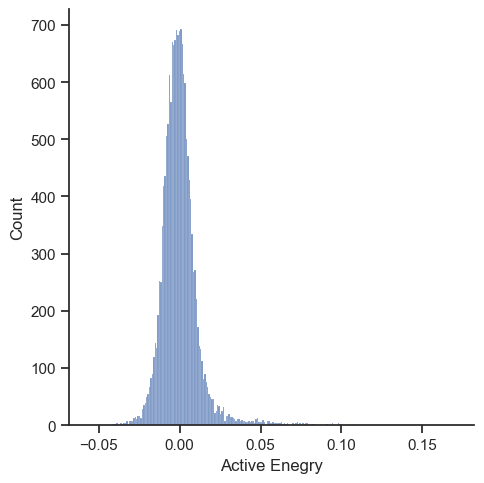

In [83]:
sns.displot(ridge_pred-y_test)

In [84]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, ridge_pred))
print(mean_absolute_error(y_test, ridge_pred))
print(np.sqrt(mean_absolute_error(y_test, ridge_pred)))

0.00015906825812394106
0.007967967752047424
0.08926347378433927


In [85]:
from sklearn.metrics import r2_score
ridge_score=r2_score(y_test,ridge_pred)
print(ridge_score)

0.9999982931851592


In [86]:
##adjusted r2 score
1-(1-ridge_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[-1]-1)

0.9999982924514059

# Lasoo Regression

In [87]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [88]:
lasso=Lasso()
parameters={'alpha':[1,2,5,10,20,30,40]}
lasso_cv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

In [89]:
lasso_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40]},
             scoring='neg_mean_squared_error')

In [90]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 1}
-1.2862624380013443


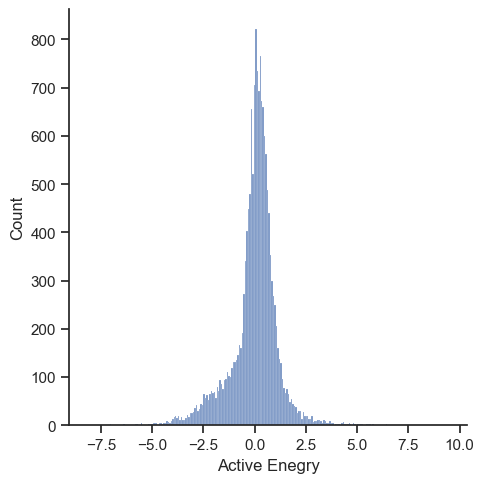

In [91]:
lasso_predt=lasso_cv.predict(X_test)
sns.displot(lasso_predt-y_test)


In [92]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, lasso_predt))
print(mean_absolute_error(y_test, lasso_predt))
print(np.sqrt(mean_absolute_error(y_test, lasso_predt)))

1.3301280251370602
0.7725098447066454
0.8789253920024415


In [93]:
from sklearn.metrics import r2_score
lasso_score=r2_score(y_test,lasso_predt)
print(lasso_score)

0.9857276223411661


In [94]:
##adjusted r2 score
1-(1-lasso_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[-1]-1)

0.9857214867000919

# Elastic_Net

In [95]:
from sklearn.linear_model import ElasticNet


In [96]:
elactic_net=ElasticNet()

In [97]:
parameters={'alpha':[1,2,5,10,20,30,40]}
elactic_net_cv=GridSearchCV(elactic_net,parameters,scoring='neg_mean_squared_error',cv=5)

In [98]:
elactic_net_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40]},
             scoring='neg_mean_squared_error')

In [99]:
print(elactic_net_cv.best_params_)
print(elactic_net_cv.best_score_)

{'alpha': 1}
-2.2045319807421158


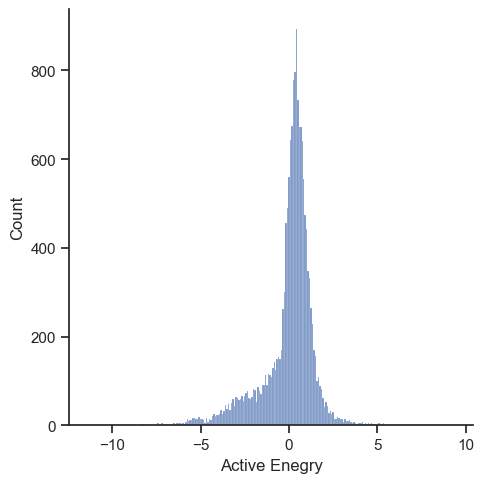

In [100]:
elastic_pred=elactic_net_cv.predict(X_test)
sns.displot(elastic_pred-y_test)

In [101]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, elastic_pred))
print(mean_absolute_error(y_test, elastic_pred))
print(np.sqrt(mean_absolute_error(y_test, elastic_pred)))

2.252220172684557
1.0080641855712968
1.0040239965116855


In [102]:
from sklearn.metrics import r2_score
elastic_score=r2_score(y_test,elastic_pred)
print(elastic_score)

0.9758335015367517


In [103]:
##adjusted r2 score
1-(1-elastic_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[-1]-1)

0.9758231124506348


# SVR 

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

X_train.shape
X_test.shape
y_train.shape
y_test.shape

(16291,)

In [108]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [109]:
X_train_scaled

array([[ 2.66358004, -0.05892827, -1.45898234, ..., -0.17706065,
         6.28607548,  1.24515359],
       [ 1.65325155, -0.59989667, -0.58105651, ..., -0.17706065,
        -0.22247502,  1.36356762],
       [-0.62758401,  0.53439191,  0.84210746, ..., -0.17706065,
        -0.22247502, -0.76788488],
       ...,
       [ 0.84043088,  1.40692158,  0.47553492, ..., -0.17706065,
         0.12008027,  1.36356762],
       [-0.75292552,  0.74379903, -0.6549871 , ..., -0.17706065,
        -0.05119738, -0.64947085],
       [-0.74722817, -0.54754488,  0.31535197, ..., -0.17706065,
        -0.22247502, -0.76788488]])

In [110]:
X_test_scaled

array([[-0.73013615,  0.18538004,  0.55870685, ..., -0.17706065,
        -0.22247502, -0.76788488],
       [-0.81559627, -1.08851328,  2.49630455, ..., -0.17706065,
        -0.22247502, -0.76788488],
       [ 2.228683  , -0.28578598, -0.96303125, ...,  5.926128  ,
        -0.22247502, -0.76788488],
       ...,
       [ 0.07698717, -0.44284132, -2.4139192 , ..., -0.17706065,
        -0.22247502,  1.12673957],
       [ 0.35995512,  0.06322589, -0.68271108, ..., -0.01210961,
         0.12008027,  1.24515359],
       [-0.45476466,  0.8136014 ,  0.20753651, ..., -0.17706065,
        -0.22247502, -0.64947085]])

In [111]:
from sklearn.svm import SVR

In [115]:
svr=SVR()
svr

SVR()

In [116]:
svr.fit(X_train_scaled,y_train)

SVR()

In [117]:
svr_pred=svr.predict(X_test_scaled)

In [118]:
svr_pred

array([ 5.35156538,  3.96553184, 20.3193975 , ...,  3.45841841,
        4.41863873,  9.19600314])

In [119]:
scr_r2_scre=r2_score(y_test,svr_pred)


In [120]:
scr_r2_scre

0.9733665144883245

In [123]:
print(" accuracy is {} %".format(round(scr_r2_scre*100,2)))

 accuracy is 97.34 %


In [131]:
adjusted_r2_score=1-(1-ridge_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[-1]-1)

In [139]:
print("accuary is {}% ".format(round(adjusted_r2_score*100,2)))

accuary is 100.0% 


In [140]:
import pickle

In [143]:
pickle.dump(scaler, open('scaler_reg.pkl','wb'))